In [288]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")


# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice
merge_df["Mouse ID"].nunique()

#counting the unique amounts of mice in column "Mouse ID"

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicated_mouse_ids = merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicated_mouse_ids



array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.

duplicates_info = merge_df.loc[merge_df["Mouse ID"] == "g989"]
duplicates_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_dups = merge_df[merge_df["Mouse ID"] != "g989"].drop_duplicates() #rows get filtered based on a boolean mask
dropped_dups

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
dropped_dups["Mouse ID"].nunique()

248

In [205]:
#grouped by drug regimen and resetting index to have the drug regimen column be first
drug_regimen_grouped = dropped_dups.set_index("Drug Regimen").reset_index()
drug_regimen_grouped

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,0,45.000000,0,Female,9,22
1,Ketapril,f932,0,45.000000,0,Male,15,29
2,Ketapril,g107,0,45.000000,0,Female,2,29
3,Ketapril,a457,0,45.000000,0,Female,11,30
4,Ketapril,c819,0,45.000000,0,Male,21,25
...,...,...,...,...,...,...,...,...
1875,Capomulin,r944,45,41.581521,2,Male,12,25
1876,Capomulin,u364,45,31.023923,3,Male,18,17
1877,Ceftamin,p438,45,61.433892,1,Female,11,26
1878,Placebo,x773,45,58.634971,4,Female,21,30


In [207]:
I509 = drug_regimen_grouped.loc[drug_regimen_grouped['Mouse ID'] == 'I509', :]
I509

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)


In [9]:
#I want to see each unique drug there 
dropped_dups["Drug Regimen"].unique()


array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

tumor_mean = dropped_dups.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [11]:
tumor_median = dropped_dups.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [12]:
tumor_variance = dropped_dups.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [13]:
tumor_std = dropped_dups.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [14]:
tumor_sem = dropped_dups.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
tumor_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [15]:
tumor_sem.index

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

In [16]:
Drug_Regimen = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

In [17]:
tumor_vol_by_drug_reg = pd.DataFrame({"Tumor Mean": tumor_mean,
                                      "Tumor Median": tumor_median,
                                      "Tumor Var": tumor_variance,
                                      "Tumor STD Dev": tumor_std,
                                      "Tumor STD Error": tumor_sem})
tumor_vol_by_drug_reg

,Tumor Mean,Tumor Median,Tumor Var,Tumor STD Dev,Tumor STD Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


In [19]:
obs_timepoint = dropped_dups.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)
obs_timepoint

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Timepoint, dtype: int64

<Axes: title={'center': '# of Observed Mouse Timepoints'}, xlabel='Drug Regimen', ylabel='Observed Mouse Time Points'>

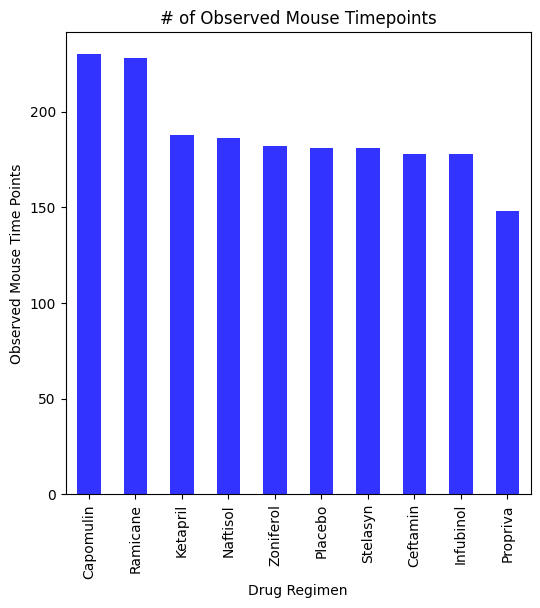

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_bar_chart = obs_timepoint.plot(kind="bar", facecolor="blue", figsize=(6,6), alpha=0.8,
                                            title= "# Observed Mouse Timepoints per Drug Regimen",
                                            xlabel="Drug Regimen",
                                            ylabel="Observed Mouse Time Points")
drug_bar_chart

In [31]:
drugs = ["Capomulin",
        "Ramicane",
        "Ketapril",
        "Naftisol",
        "Zoniferol",
        "Placebo",
        "Stelasyn",
        "Ceftamin",
        "Infubinol",
        "Propriva"]
mouse_tp_count = [230,
                    228,
                    188,
                    186,
                    182,
                    181,
                    181,
                    178,
                    178,
                    148]
x_axis = np.arange(len(mouse_tp_count))

Text(0, 0.5, '# of Observed Mouse Timepoints')

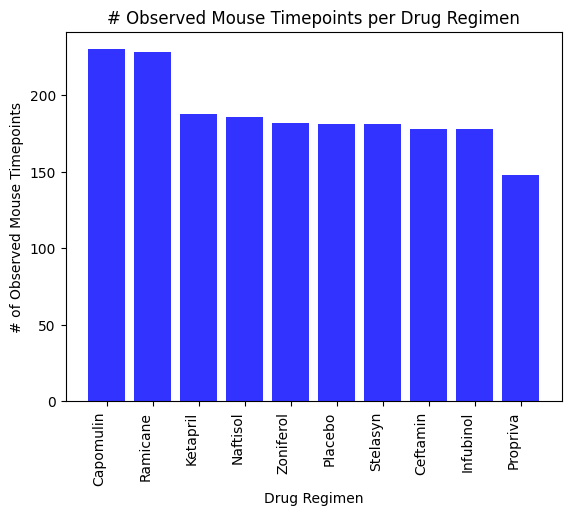

In [45]:
plt.bar(drugs, mouse_tp_count, color="b", alpha=0.8)
plt.xticks(rotation=90, ha="right") 
plt.title("# Observed Mouse Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

In [54]:
sex_rats = dropped_dups['Sex'].value_counts()
sex_rats_df = pd.DataFrame(sex_rats).reset_index()
sex_rats_df['Total Count'] = 958 + 922
sex_rats_df['Percentage'] = (sex_rats_df['count']/ sex_rats_df['Total Count'])*100
sex_rats_df

,Sex,count,Total Count,Percentage
0,Male,958,1880,50.957447
1,Female,922,1880,49.042553


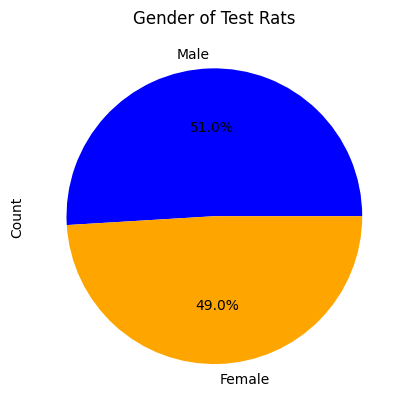

In [72]:
sex_rats_df['Percentage'].plot(kind='pie', autopct='%1.1f%%', colors=['Blue', 'Orange'], labels= ['Male', 'Female'], ylabel= 'Count', title = "Gender of Test Rats")
plt.show()


Text(0.5, 1.0, 'Gender Distribution of Test Rats')

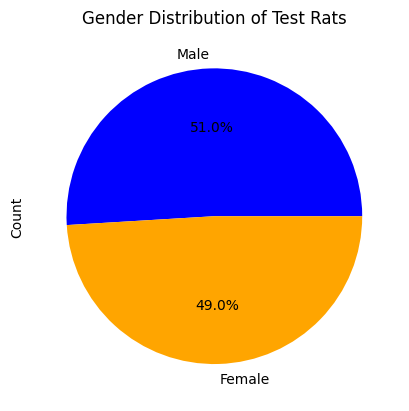

In [79]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [958, 922]

# The colors of each section of the pie chart
colors = ["Blue", "Orange"]

# Get the unique mice with their gender


# Make the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

#adding the labels
plt.ylabel("Count")
plt.title("Gender Distribution of Test Rats")

In [86]:
list_of_mouse_ids = dropped_dups['Mouse ID'].unique()
list_of_mouse_ids

array(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923',
       'q119', 'f993', 'z234', 'b559', 'y260', 'x930', 'o725', 'z969',
       'v835', 'r604', 'n304', 'l700', 'x336', 'l725', 'm133', 'v295',
       'a818', 'y601', 't724', 'k382', 'w422', 'c326', 'c139', 'v339',
       'a577', 'y163', 'k483', 'k804', 'o809', 'z581', 'a251', 'i386',
       'c580', 'q132', 'u327', 'v603', 'f278', 'g497', 'd474', 'o973',
       'c832', 'o331', 'm650', 'v289', 'm550', 'h428', 'r701', 'v199',
       'x264', 'f234', 'c458', 'q610', 'j913', 'a411', 'a444', 'd251',
       'j989', 'y449', 'k403', 'c758', 'x402', 'r811', 'a644', 'i177',
       'g791', 'a520', 'u196', 'm546', 'w678', 'n364', 's508', 'e662',
       'z578', 'r921', 'a492', 'w540', 'v764', 'z795', 'e291', 'e584',
       'e213', 'j755', 's565', 'a366', 'p387', 'b879', 'i901', 'k862',
       'g867', 's619', 'w697', 'j984', 'c402', 'h333', 'k510', 'p981',
       't451', 'a963', 'm269', 'z314', 'o848', 'v719', 'q597', 'c895',
      

In [104]:
final_tumor_vol = dropped_dups.groupby(['Mouse ID', 'Drug Regimen'])['Tumor Volume (mm3)'].max()
final_tumor_vol_df = pd.DataFrame(final_tumor_vol).reset_index()
final_tumor_vol_df

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a262,Placebo,70.717621
3,a275,Ceftamin,62.999356
4,a366,Stelasyn,63.440686
...,...,...,...
243,z435,Propriva,48.710661
244,z578,Ramicane,45.000000
245,z581,Infubinol,62.754451
246,z795,Naftisol,65.741070


In [102]:
greatest_tp = dropped_dups.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max()
greatest_tp_df = pd.DataFrame(greatest_tp).reset_index()
greatest_tp_df

,Mouse ID,Drug Regimen,Timepoint
0,a203,Infubinol,45
1,a251,Infubinol,45
2,a262,Placebo,45
3,a275,Ceftamin,45
4,a366,Stelasyn,30
...,...,...,...
243,z435,Propriva,10
244,z578,Ramicane,45
245,z581,Infubinol,45
246,z795,Naftisol,45


In [120]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest_tp = dropped_dups.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max()
greatest_tp_df = pd.DataFrame(greatest_tp).reset_index()

greatest_tp_df.loc[['Drug Regimen'] = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], :]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_tumors_df = pd.merge(greatest_tp_df, dropped_dups, on=['Mouse ID', 'Timepoint'], how='inner').rename(columns={'Drug Regimen_x':'Drug Regimen'}).drop(columns= 'Drug Regimen_y')
merged_tumors_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,a203,Infubinol,45,67.973419,2,Female,20,23
1,a251,Infubinol,45,65.525743,1,Female,21,25
2,a262,Placebo,45,70.717621,4,Female,17,29
3,a275,Ceftamin,45,62.999356,3,Female,20,28
4,a366,Stelasyn,30,63.440686,1,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,Propriva,10,48.710661,0,Female,12,26
244,z578,Ramicane,45,30.638696,0,Male,11,16
245,z581,Infubinol,45,62.754451,3,Female,24,25
246,z795,Naftisol,45,65.741070,3,Female,13,29


In [295]:
# Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_df = merged_tumors_df.loc[greatest_tp_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']), :].drop(columns= ['Mouse ID', 'Timepoint', 'Metastatic Sites', 'Sex', 'Age_months', 'Weight (g)'])
filtered_df

,Drug Regimen,Tumor Volume (mm3)
0,Infubinol,67.973419
1,Infubinol,65.525743
3,Ceftamin,62.999356
6,Ramicane,38.407618
7,Ramicane,43.047543
...,...,...
238,Ceftamin,68.594745
239,Capomulin,31.896238
240,Ceftamin,64.729837
244,Ramicane,30.638696


In [296]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = dropped_dups["Drug Regimen"].unique().tolist()
drug_regimens



# Create empty list to fill with tumor vol data (for plotting)
#['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
capomulin_tumors = []
ramicane_tumors = []
infubinol_tumors = []
ceftamin_tumors = []



#for loop

for x in filtered_df.loc[filtered_df['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)']:
    capomulin_tumors.append(x)
capomulin_tumors

for x in filtered_df.loc[filtered_df['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)']:
    ramicane_tumors.append(x)
ramicane_tumors

for x in filtered_df.loc[filtered_df['Drug Regimen'] == 'Infubinol', 'Tumor Volume (mm3)']:
    infubinol_tumors.append(x)
infubinol_tumors

for x in filtered_df.loc[filtered_df['Drug Regimen'] == 'Ceftamin', 'Tumor Volume (mm3)']:
    ceftamin_tumors.append(x)
ceftamin_tumors
# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds

[62.99935619,
 45.0,
 56.05774909,
 55.74282869,
 48.72207785,
 47.7846818,
 61.84902336,
 68.92318457,
 67.74866174,
 57.91838132,
 46.78453491,
 59.85195552,
 64.29983003,
 59.74190064,
 61.43389223,
 64.19234114,
 45.0,
 52.92534846,
 45.0,
 67.52748237,
 45.0,
 64.63494887,
 61.38666032,
 68.59474498,
 64.72983655]

In [184]:
print(infubinol_tumors)

[67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309, 36.3213458, 60.96971133, 62.43540402, 60.91876652, 67.28962147, 66.19691151, 62.11727887, 47.01036401, 60.16518046, 55.62942846, 45.69933088, 54.65654872, 55.65068132, 46.25011212, 54.04860769, 51.54243058, 50.00513807, 58.26844248, 67.68556862, 62.75445141]


In [172]:
quartile_cap = filtered_df.loc[filtered_df['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
lowerq_cap = quartile_cap[0.25]
median_cap = quartile_cap[0.5]
upperq_cap = quartile_cap[0.75]
iqr_cap = upperq_cap - lowerq_cap
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)
print('Capomulin')
print('---------------------------')
print("lower quartile:", lowerq_cap)
print("median:", median_cap)
print("upper quartile:", upperq_cap)
print("lower bound:", lower_bound_cap)
print("upper bound:", upper_bound_cap)

Capomulin
---------------------------
lower quartile: 32.37735684
median: 38.1251644
upper quartile: 40.1592203
lower bound: 20.70456164999999
upper bound: 51.83201549


In [300]:
#There aren't outliers for Capomulin
pot_outliers_cap = filtered_df.loc[
    (filtered_df['Drug Regimen'] == 'Capomulin') & 
    (
        (filtered_df['Tumor Volume (mm3)'] < lower_bound_cap) | 
        (filtered_df['Tumor Volume (mm3)'] > upper_bound_cap)
    ), 
    :
]

print('Capomulin potential outliers:', pot_outliers_cap)

Capomulin potential outliers: Empty DataFrame
Columns: [Drug Regimen, Tumor Volume (mm3)]
Index: []


In [170]:
quartile_ram = filtered_df.loc[filtered_df['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
lowerq_ram = quartile_ram[0.25]
median_ram = quartile_ram[0.5]
upperq_ram = quartile_ram[0.75]
iqr_ram = upperq_ram - lowerq_ram
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)
print('Ramicane')
print('---------------------------')
print("lower quartile:", lowerq_ram)
print("median:", median_ram)
print("upper quartile:", upperq_ram)
print("lower bound:", lower_bound_ram)
print("upper bound:", upper_bound_ram)

Ramicane
---------------------------
lower quartile: 31.56046955
median: 36.56165229
upper quartile: 40.65900627
lower bound: 17.912664470000003
upper bound: 54.30681135


In [297]:
#there aren't ramicane outliers
pot_outliers_ram = []
pot_outliers_ram = filtered_df.loc[
    (filtered_df['Drug Regimen'] == 'Ramicane') & 
    (
        (filtered_df['Tumor Volume (mm3)'] < lower_bound_ram) | 
        (filtered_df['Tumor Volume (mm3)'] > upper_bound_ram)
    ), 
    :
]

print('Ramicane potential outliers:',pot_outliers_ram)

Ramicane potential outliers: Empty DataFrame
Columns: [Drug Regimen, Tumor Volume (mm3)]
Index: []


In [169]:
quartile_inf = filtered_df.loc[filtered_df['Drug Regimen'] == 'Infubinol', 'Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
lowerq_inf = quartile_inf[0.25]
median_inf = quartile_inf[0.5]
upperq_inf = quartile_inf[0.75]
iqr_inf = upperq_inf - lowerq_inf
lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)
print('Infubinol')
print('---------------------------')
print("lower quartile:", lowerq_inf)
print("median:", median_inf)
print("upper quartile:", upperq_inf)
print("lower bound:", lower_bound_inf)
print("upper bound:", upper_bound_inf)

Infubinol
---------------------------
lower quartile: 54.04860769
median: 60.16518046
upper quartile: 65.52574285
lower bound: 36.83290494999999
upper bound: 82.74144559000001


In [298]:
#There is a lower bound outlier for Infubinol
pot_outliers_inf = filtered_df.loc[
    (filtered_df['Drug Regimen'] == 'Infubinol') & 
    (
        (filtered_df['Tumor Volume (mm3)'] < lower_bound_inf) | 
        (filtered_df['Tumor Volume (mm3)'] > upper_bound_inf)
    ), 
    :
]

print('Infubinol potential outliers:', pot_outliers_inf)

Infubinol potential outliers:    Drug Regimen  Tumor Volume (mm3)
31    Infubinol           36.321346


In [168]:
quartile_ceft = filtered_df.loc[filtered_df['Drug Regimen'] == 'Ceftamin', 'Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
lowerq_ceft = quartile_ceft[0.25]
median_ceft = quartile_ceft[0.5]
upperq_ceft = quartile_ceft[0.75]
iqr_ceft = upperq_ceft - lowerq_ceft
lower_bound_ceft = lowerq_ceft - (1.5*iqr_ceft)
upper_bound_ceft = upperq_ceft + (1.5*iqr_ceft)
print('Ceftamin')
print('---------------------------')
print("lower quartile:", lowerq_ceft)
print("median:", median_ceft)
print("upper quartile:", upperq_ceft)
print("lower bound:", lower_bound_ceft)
print("upper bound:", upper_bound_ceft)


Ceftamin
---------------------------
lower quartile: 48.72207785
median: 59.85195552
upper quartile: 64.29983003
lower bound: 25.355449580000002
upper bound: 87.66645829999999


In [299]:
#no outliers for ceftamin
pot_outliers_ceft = filtered_df.loc[
    (filtered_df['Drug Regimen'] == 'Ceftamin') & 
    (
        (filtered_df['Tumor Volume (mm3)'] < lower_bound_ceft) | 
        (filtered_df['Tumor Volume (mm3)'] > upper_bound_ceft)
    ), 
    :
]

print("Capomulin's potential outliers:", pot_outliers_ceft)

Capomulin's potential outliers: Empty DataFrame
Columns: [Drug Regimen, Tumor Volume (mm3)]
Index: []


C:\Users\luzch\AppData\Local\Temp\ipykernel_15276\2379609055.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([capomulin_data, ramicane_data, infubinol_data, ceftamin_data], labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'],  flierprops=flierprops)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

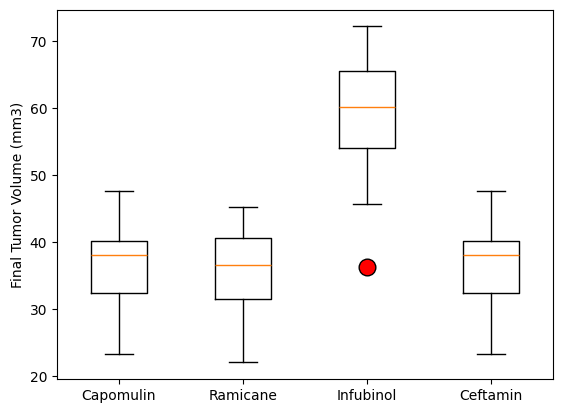

In [301]:
capomulin_data = filtered_df.loc[filtered_df['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)']
ramicane_data = filtered_df.loc[filtered_df['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)']
infubinol_data = filtered_df.loc[filtered_df['Drug Regimen'] == 'Infubinol', 'Tumor Volume (mm3)']
ceftamin_data = filtered_df.loc[filtered_df['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)']

flierprops = dict(marker='o', markersize=12, markerfacecolor='red')
plt.boxplot([capomulin_data, ramicane_data, infubinol_data, ceftamin_data], labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'],  flierprops=flierprops)
plt.ylabel("Final Tumor Volume (mm3)")




In [302]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin (I did 3 just familiarize myself with the code)
R944= dropped_dups.loc[(dropped_dups['Mouse ID'] == 'r944'), :]
dropped_R944= R944.drop(columns= ['Mouse ID', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'])
dropped_R944

,Timepoint,Tumor Volume (mm3)
239,0,45.000000
432,5,45.737145
630,10,46.544292
761,15,47.373423
1001,20,43.225671
1118,25,41.086991
1412,30,41.680791
1556,35,40.401765
1650,40,41.042045
1888,45,41.581521


Text(0.5, 1.0, 'Capomulin Treatment of Mouse R944')

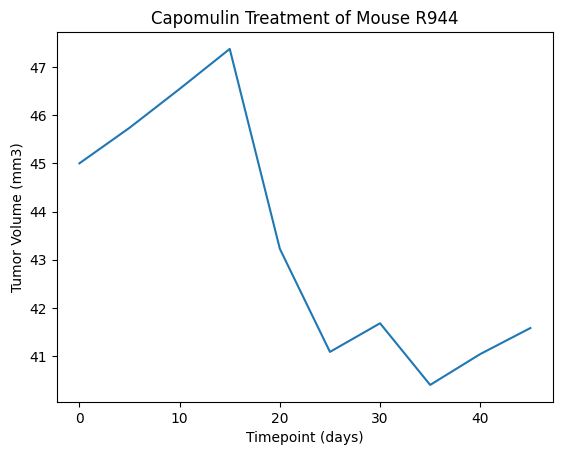

In [303]:
plt.plot(dropped_R944['Timepoint'], dropped_R944['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse R944')

In [228]:
Y793 = dropped_dups.loc[(dropped_dups['Mouse ID'] == 'y793'), :]
Y793_dropped = Y793.drop(columns= ['Mouse ID', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'])
Y793_dropped

,Timepoint,Tumor Volume (mm3)
240,0,45.000000
387,5,41.019913
599,10,41.630010
767,15,42.283665
1051,20,40.716428
1292,25,38.992734
1464,30,35.726023
1564,35,36.327870
1711,40,31.475411
1797,45,31.896238


Text(0.5, 1.0, 'Capomulin Treatment of Mouse Y793')

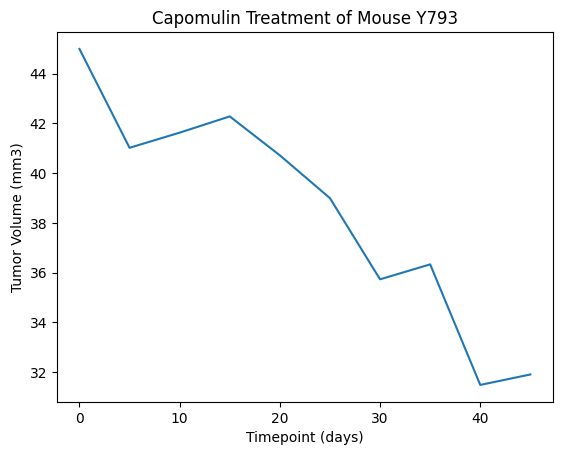

In [229]:
plt.plot(Y793_dropped['Timepoint'], Y793_dropped['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse Y793')

In [230]:
L509 = dropped_dups.loc[(dropped_dups['Mouse ID'] == 'l509'), :]
L509_dropped = L509.drop(columns= ['Mouse ID', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'])
L509_dropped

,Timepoint,Tumor Volume (mm3)
231,0,45.000000
253,5,45.851193
539,10,46.759074
881,15,47.488599
982,20,48.070452
1146,25,44.006257
1414,30,44.708055
1499,35,40.207288
1723,40,40.770813
1771,45,41.483008


Text(0.5, 1.0, 'Capomulin Treatment of Mouse L509')

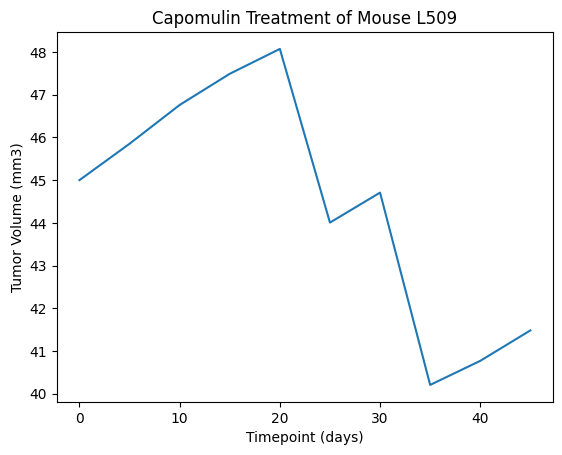

In [231]:
plt.plot(L509_dropped['Timepoint'], L509_dropped['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse L509')

In [264]:
Capomulin_W_v_T = dropped_dups.loc[(dropped_dups['Drug Regimen'] == 'Capomulin'), :]
Capomulin_W_v_T

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [275]:
#getting the average tumor volume and weight per mouse ID
grouped_data = Capomulin_W_v_T.groupby('Mouse ID').agg({
    'Tumor Volume (mm3)': 'mean',
    'Weight (g)': 'mean'
}).reset_index()
grouped_data

,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22.0
1,b742,40.083699,21.0
2,f966,36.505973,17.0
3,g288,41.990097,19.0
4,g316,44.613344,22.0
5,i557,44.805810,24.0
6,i738,39.141053,20.0
7,j119,44.465236,23.0
8,j246,43.216925,21.0
9,l509,44.434474,21.0


Text(0.5, 1.0, 'Tumor Vol v Weight')

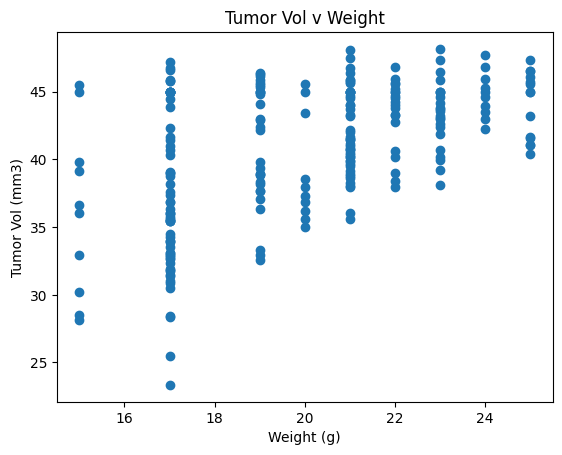

In [252]:
#this is not correct, I just wanted to see how this would look like
# plt.scatter(Capomulin_W_v_T['Weight (g)'], Capomulin_W_v_T['Tumor Volume (mm3)'])
# plt.xlabel('Weight (g)')
# plt.ylabel('Tumor Vol (mm3)')
# plt.title('Tumor Vol v Weight')

Text(0.5, 1.0, 'Weight v Avg Tumor Vol')

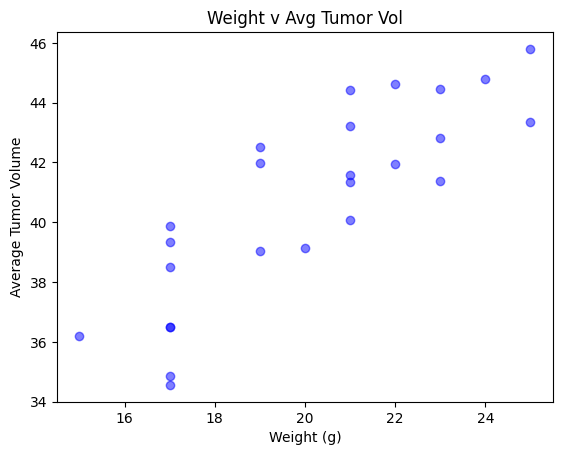

In [284]:
#Scatter Plot Weight V Avg Tumor Vol
tumor_v_weight = plt.scatter(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'], color='blue', alpha=0.5)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title('Weight v Avg Tumor Vol')

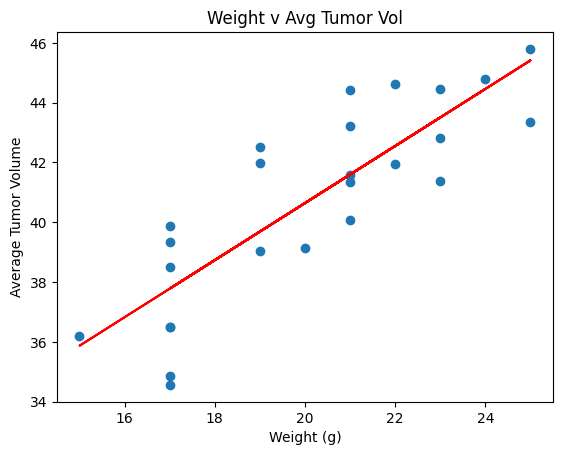

The correlation coefficient is 0.84 which indicates a positive correlation.


In [291]:
#Scatter Plot Weight V Avg Tumor Vol w/ Linear Regression Line
x = grouped_data['Weight (g)']
y = grouped_data['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title('Weight v Avg Tumor Vol')
plt.show()
correlation = st.pearsonr(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'])
correlation
print(f"The correlation coefficient is {round(correlation[0],2)} which indicates a positive correlation.")